# Machine Learning Group Project 

User game rating prediction & systematic discount offering on Steam. Project developed by Team XX composed by:
| Student Name | Student Number | Class Group |
| --- | --- | --- |
| **Alessandro Maugeri** | 53067 | TA |
| **Frank Andreas Bauer** | XXXX | XX |
|  **Johannes Rahn** | 53958 | TB |
| **Nicole Zoppi** | XXXX | XX |
| **Yannick von der Heyden** | XXXX | XX |

## Importing Packages

In [2]:
import ast
import pandas as pd
import numpy as np
from datetime import datetime

## Importing Data

The data for this project was retrieved from [Kaggle](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=games.csv) and stored in the "data" folder found in the notebook's directory. The folder includes **five data files**:

The CSV file **[games.csv](data/games.csv)** presents data concerning individual games in the Steam library:

| Column | Description | Example|
| --- | --- | --- |
| **app_id** | Product ID on Steam | 620 |
| **title** | Product Commercial Title | Portal 2|
|  **date_release** | Release Date of Title (y-m-d) | 2011-04-18 |
| **win** | Boolean Denoting Compatibility to Windows Computers | True |
| **mac** | Boolean Denoting Compatibility to Mac Computers  | True | 
| **linux** | Boolean Denoting Compatibility to Linux Computers  | True |
| **rating** | Categorical Rating of Product (e.g. "Positive")| Overwhelmingly Positive |
| **positive_ratio** | Ratio of Postive Feedback for Game  | 98 |
| **user_reviews** | Number of Reviews  | 267142 |
| **price_final** | Final Price in USD | 9.99 |
| **price_original** | Price Before Discounts in USD | 9.99 |
| **discount** | Applied Discount | 0 |
| **steam_deck** | Compatible with [Steam Deck](https://store.steampowered.com/steamdeck)? | True |



In [3]:
df_games_data = pd.read_csv("data/games.csv")
df_games_data.head(2)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True


----
The **CSV file [users.csv](data/users.csv)** presents data concerning individual users found in the datasets:

| Column | Description | Example|
| --- | --- | --- |
| **user_id** | User ID on Steam | 5693478 |
| **products** | Number of Products from Steam Library Owned | 156 |
|  **reviews** | Number of Reviews Published | 1 |

In [4]:
df_users = pd.read_csv("data/users.csv")
df_users.head(2)

,user_id,products,reviews
0,5693478,156,1
1,3595958,329,3


----
The **CSV file [recommendations.csv](data/recommendations.csv)** has a many-to-many relationship to both users.csv and games.csv and contains data concerning user reviews of specific games:

| Column | Description | Example|
| --- | --- | --- |
| **app_id** | Product ID on Steam | 620 |
| **helpful** | Number of Users Who Found Review Helpful | 0 |
|  **funny** | Number of Users Who Found Review Funny | 0 |
| **date** | Date in Which Review was Published (y-m-d) | 2022-12-12 |
| **is_recommended** | Does the User Recommend the Title | True | 
| **hours** | Hours Spent by User Playing Game  | 36.3 |
| **user_id** | User ID of Review Author | 19954 |
| **review_id** | ID of Individual Review  | 0 |

In [5]:
df_recommendations = pd.read_csv("data/recommendations.csv")
df_recommendations.head(2)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,19954,0
1,304390,4,0,2017-02-17,False,11.5,1098,1


----
Finally, the folder includes a **JSON file [games_metadata.json](data/games_metadata.json)** containing metadata on individual games:

| Column | Description | Example|
| --- | --- | --- |
| **app_id** | Product ID on Steam | 304430 |
| **description** | Game Description on Steam | "Hunted and alone, a boy finds himself drawn into the center of a dark project. INSIDE is a dark, narrative-driven platformer combining intense action with challenging puzzles. It has been critically acclaimed for its moody art style, ambient soundtrack and unsettling atmosphere." |
|  **tags** | Additional Tags on Steam Platform | ["2.5D", "Story Rich", "Puzzle Platformer" , "Atmospheric" , "Adventure" , "Indie" , "Dark" , "Horror" , "Singleplayer" , "Action-Adventure" , "Puzzle" , "Multiple Endings" , "Exploration" , "2D Platformer" , "Platformer" , "Controller" , "Soundtrack" , "Ambient" , "Action" , "Narrative"] |

In [6]:
df_games_meta_data = pd.read_json('data/games_metadata.json', lines=True)
df_games_meta_data.head(2)

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."


----
Two additional data files are utilized from a separate [Kaggle page](https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam.csv) to enrich the analysis. These are imported below.


The **CSV file [steam.csv](data/steam.csv)** provides additional data on the games:

| Column | Description | Example|
| --- | --- | --- |
| **appid** | Product ID on Steam| 10 |
| **name** | Name of Game | Counter-Strike |
|  **release_date** | Release Date of Title (y-m-d) | 2000-11-01 |
|  **english** | Is the Game Available in English? | 1 |
|  **developer** | Developer Company of Game | Valve |
|  **publisher** | Publishing Company of Game | Valve |
|  **platforms** | Semicolon-Delimited List of Systems that Can Run the Game | windows;mac;linux |
|  **required_age** | Minimum Age Required to Play by PEGI UK (0 Means Unsupplied) | 0 |
|  **categories** | Game Categorisation (Semicolon Delimited) | Multi-player;Online Multi-Player... |
|  **genres** | Game's Genre (Semicolon Delimteted) | Action |
|  **steamspy_tags** | Tags from [Steamspy API](https://steamspy.com/) (Semicolon Delimited) | Action;FPS;Multiplayer |
|  **achievements** | Number of In-Game Achievements (If Any) | 0 |
|  **positive_ratings** | Number of Positive Ratings | 124534 |
|  **negative_ratings** | Number of Negative Ratings | 3339 |
|  **average_playtime** | Average Playtime by User in Minutes| 17612 |
|  **median_playtime** | Median Playtime by User in Minutes | 317 |
|  **owners** | Number of Users that Own the Game (Bracket) | 10000000-20000000 |
|  **price** | Price of Game | 7.19 |



In [7]:
df_games_additional = pd.read_csv("data/steam.csv")
df_games_additional.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99


### JOEY'S TASK
The **CSV file [blabla.csv](data/steam.csv)** contains information about system requirements in order to run the games:

| Column | Description | Example|
| --- | --- | --- |
| **JOEY** | Product ID on Steam| 10 |
| **JOEY** | Name of Game | Counter-Strike |
|  **JOEY** | Release Date of Title (y-m-d) | 2000-11-01 |
|  **JOEY** | Is the Game Available in English? | 1 |

In [8]:
# File Import 

## Preliminary Data Exploration

In [9]:
df_games_data["rating"].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Mostly Negative',
       'Overwhelmingly Negative', 'Negative', 'Very Negative'],
      dtype=object)

In [10]:
df_games_additional["owners"].unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [11]:
df_games_additional["developer"].value_counts()

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
                              ..
CRAPPY ZOMBIE GAME STUDIO      1
Ramon Mujica                   1
Oomst Games                    1
Joe Censored Games             1
Adept Studios GD               1
Name: developer, Length: 17113, dtype: int64

## Data Preparation

#### Games Data
- Turning relevant columns to datetime objects
- **AA IF ANYTHING ELSE PLEASE ADD**

In [12]:
# Turn date_release column to Pandas DateTime
df_games_data["date_release"] = pd.to_datetime(df_games_data["date_release"])

#### Additional Game Data
- Drop features that are redundant with df_games_data

In [13]:
# Drop Redundant Columns
df_games_additional.drop(["name","platforms", "release_date", "price", 
                          "positive_ratings", "negative_ratings", "categories"], axis = 1, inplace = True)

In [14]:
df_games_additional.head(1)

,appid,english,developer,publisher,required_age,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners
0,10,1,Valve,Valve,0,Action,Action;FPS;Multiplayer,0,17612,317,10000000-20000000


#### Recommendations Data
- Turn date features into datetime objects
- Rename is_recommended to y, to signal it is the target variable

In [15]:
# Turn to DateTime
df_recommendations["date"] = pd.to_datetime(df_recommendations["date"])

# Rename column
df_recommendations.rename(columns = {"is_recommended": "y"}, inplace = True)

#### Games Metadata

In [16]:
# Turn the Tags Column Into a List
df_games_meta_data["tags"] = df_games_meta_data["tags"].astype(str).apply(ast.literal_eval)

## Merging Datasets

We merge the data into one single final DataFrame.

In [17]:
# Merge all information on games to one DataFrame
games_df = df_games_data.merge(df_games_meta_data, how = "inner")
games_df = games_df.merge(df_games_additional, how = "inner",
                          left_on = "app_id", right_on = "appid")

# Merge game information into the recommendations DataFrame
recs_df = df_recommendations.merge(games_df, how = "inner", on = "app_id")

# Merge all information on users into a final DataFrame
final_df = recs_df.merge(df_users, how="inner", on = "user_id")

In [ ]:
final_df.describe()

# Save df to file
final_df.to_csv('data/final_df.csv', index = False)

## Data Exploration

In [18]:
final_df.shape

(6564923, 35)

In [19]:
total_nans = final_df.isna().sum().sum()
print(f"Total NaNs in the final_df DataFrame: {total_nans}")

Total NaNs in the final_df DataFrame: 0


In [20]:
# describe final_df
final_df.describe(percentiles=[.1, .25, .5, .75, .9]).round(2).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
app_id,6564923.0,333103.39,185197.05,70.0,49520.0,238960.00,294100.00,431960.00,594650.00,1032430.00
helpful,6564923.0,3.46,58.34,0.0,0.0,0.00,0.00,0.00,3.00,29627.00
funny,6564923.0,1.39,48.06,0.0,0.0,0.00,0.00,0.00,0.00,28088.00
hours,6564923.0,190.43,237.30,0.0,7.6,23.60,83.00,268.90,574.10,999.90
user_id,6564923.0,3004127.70,1650810.13,0.0,614340.0,1666029.00,3047610.00,4435053.00,5229131.00,5810792.00
review_id,6564923.0,5136968.74,2967648.97,1.0,1024397.2,2559700.00,5120629.00,7756637.50,9286506.60,10072269.00
positive_ratio,6564923.0,87.83,7.84,44.0,78.0,83.00,88.00,94.00,97.00,98.00
user_reviews,6564923.0,415855.42,1132509.05,174.0,21086.0,52226.00,105614.00,204840.00,722973.00,6941137.00
price_final,6564923.0,21.18,15.57,0.0,0.0,9.99,19.99,29.99,39.99,59.99
price_original,6564923.0,22.42,16.51,0.0,0.0,9.99,19.99,29.99,39.99,109.99


**Correlation Matrix**

/var/folders/jb/9xp08w9911z54x3w83qfzx2w0000gn/T/ipykernel_89926/1089923943.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyze['rating'] = df_analyze['rating'].map(rating_map)
/var/folders/jb/9xp08w9911z54x3w83qfzx2w0000gn/T/ipykernel_89926/1089923943.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyze['y'] = df_analyze['y'].map({True: 1, False: 0})


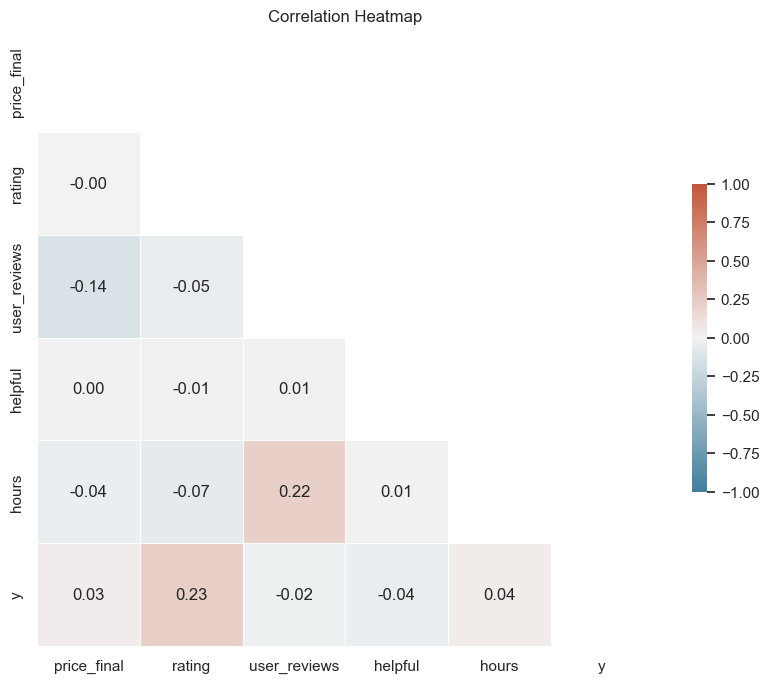

In [21]:
# correlations between different variables, such as price and rating, user reviews and helpful votes, or hours played and recommendation status.

import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


df_analyze = final_df[['price_final', 'rating', 'user_reviews', 'helpful', 'hours', 'y']]

# Convert rating column to numerical values
rating_map = {
    'Overwhelmingly Positive': 5,
    'Very Positive': 4,
    'Mostly Positive': 3,
    'Mixed': 2,
    'Mostly Negative': 1,
    'Very Negative': 0
}
df_analyze['rating'] = df_analyze['rating'].map(rating_map)

# Convert is_recommended column to binary values
df_analyze['y'] = df_analyze['y'].map({True: 1, False: 0})

# Calculate the correlation matrix
corr_matrix = df_analyze.corr()

# Setting seaborn style
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(10, 8))


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


As expected, be observe the strongest positive correlations between is_recommended and rating and user_reviews and hours. Hours and is_recommended are also slightly correlated.
The final price seems to have a negative influence on user_reviews and the rating.

**Frequency Distribution of Final Prices**

<Figure size 1000x500 with 0 Axes>

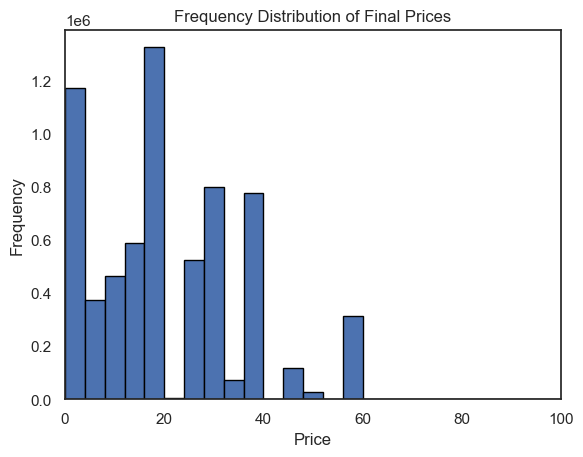

In [22]:
# frequency distribution of final prices

plt.figure(figsize=(10, 5))
plt.figure(dpi=100)
plt.hist(final_df['price_final'], bins=25, edgecolor='black', range=(0, 100))
plt.title('Frequency Distribution of Final Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Set the x-axis limits to 0 and 110
plt.show()

**Boxplot of Final Prices**

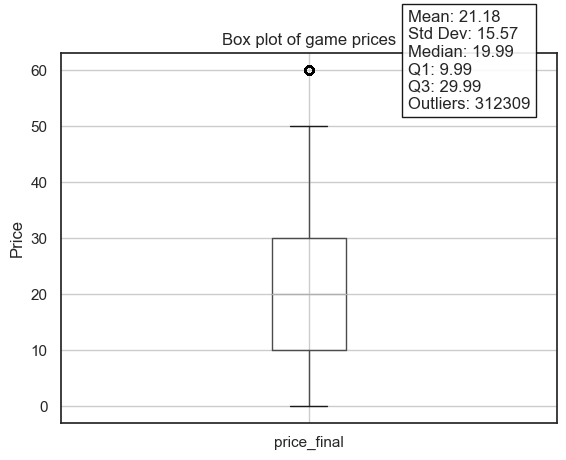

In [23]:
# boxplot of final price

ax = final_df.boxplot('price_final')

ax.set_ylabel('Price')
ax.set_title('Box plot of game prices')

stats = final_df['price_final'].describe()
mean = final_df['price_final'].mean()
std_dev = final_df['price_final'].std()

# calculate outliers
q1 = stats['25%']
q3 = stats['75%']
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = final_df[(final_df['price_final'] < lower_bound) | (final_df['price_final'] > upper_bound)]['price_final']
num_outliers = outliers.count()

# add statistics to the plot
ax.text(0.7, 0.85, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nMedian: {stats['50%']:.2f}\nQ1: {stats['25%']:.2f}\nQ3: {stats['75%']:.2f}\nOutliers: {num_outliers}",
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', alpha=0.9))


plt.show()


**Frequency Distribution of Rating**

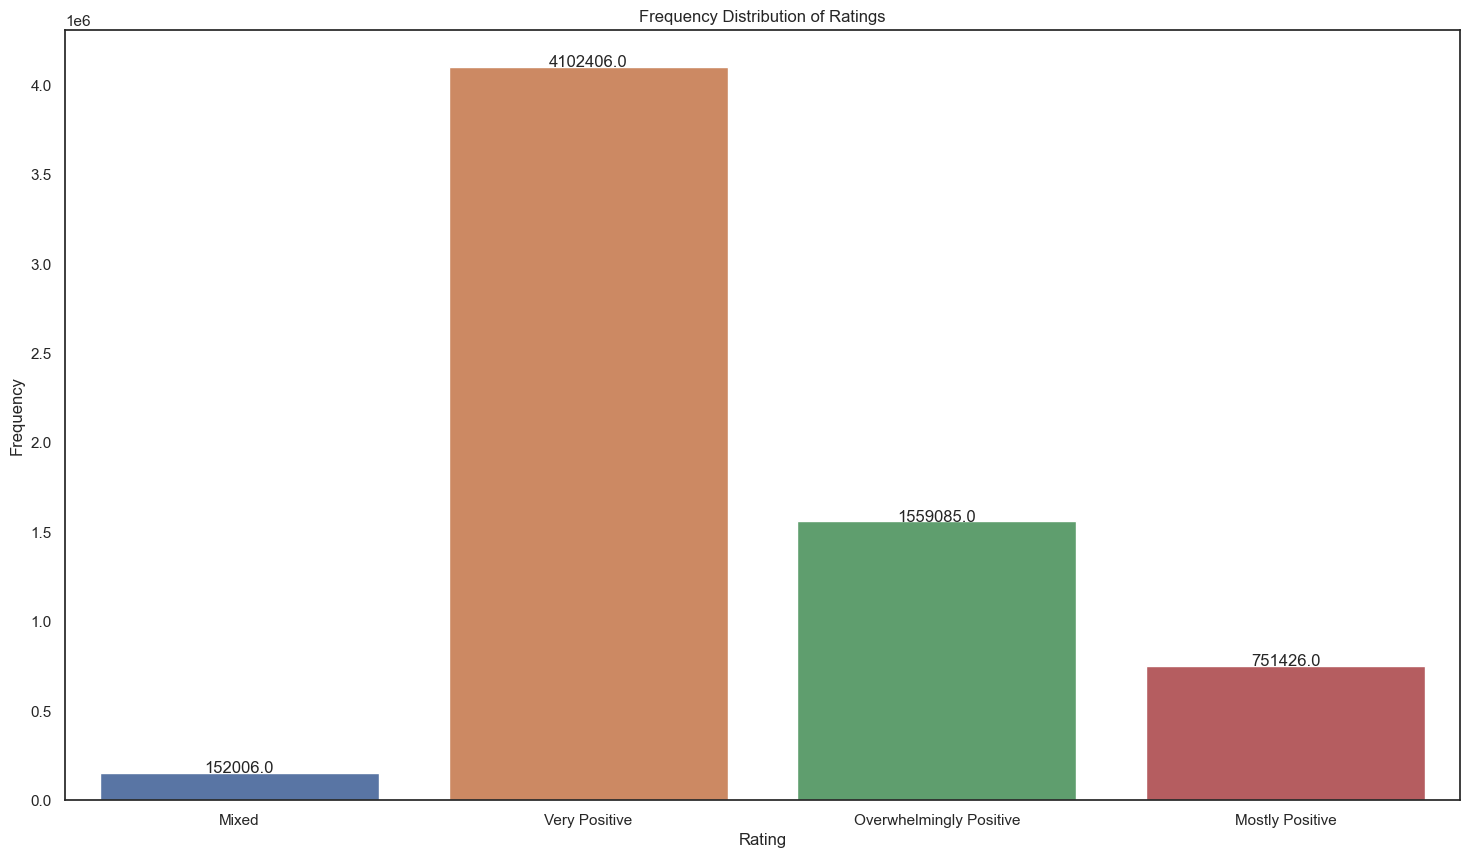

In [24]:
# Plotting the frequency distribution of rating

plt.figure(figsize=(18, 10))
ax = sns.countplot(x='rating', data=final_df)
plt.title('Frequency Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

**Frequency Distribution of Recommendations**

<Figure size 1000x500 with 0 Axes>

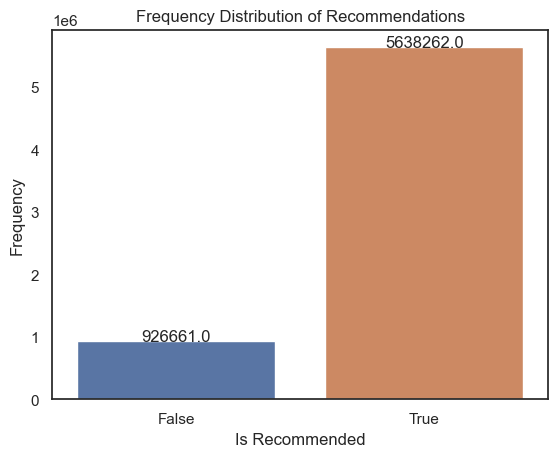

In [25]:
# Plotting the frequency distribution of number of recommendations

plt.figure(figsize=(10, 5))
plt.figure(dpi=100)
ax = sns.countplot(x='y', data=final_df)
plt.title('Frequency Distribution of Recommendations')
plt.xlabel('Is Recommended')
plt.ylabel('Frequency')

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

**Compatibility of Windows, Mac and Linux**

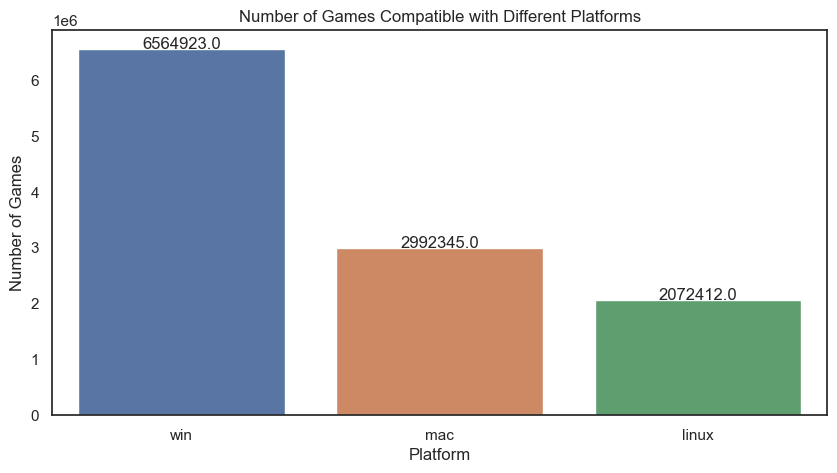

In [26]:
# compatibility with different platforms

# Calculating the number of games compatible with each platform
platform_counts = final_df[['win', 'mac', 'linux']].sum().reset_index()
platform_counts.columns = ['Platform', 'Count']

plt.figure(figsize=(10, 5))

ax = sns.barplot(x='Platform', y='Count', data=platform_counts)
plt.title('Number of Games Compatible with Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Games')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [27]:
# Calculate the number of games supporting each combination of platforms (windows, mac, linux)

win_only = ((final_df['win'] == True) & (final_df['mac'] == False) & (final_df['linux'] == False)).sum()
win_mac = ((final_df['win'] == True) & (final_df['mac'] == True) & (final_df['linux'] == False)).sum()
win_linux = ((final_df['win'] == True) & (final_df['mac'] == False) & (final_df['linux'] == True)).sum()
win_mac_linux = ((final_df['win'] == True) & (final_df['mac'] == True) & (final_df['linux'] == True)).sum()
mac_only = ((final_df['win'] == False) & (final_df['mac'] == True) & (final_df['linux'] == False)).sum()
linux_only = ((final_df['win'] == False) & (final_df['mac'] == False) & (final_df['linux'] == True)).sum()

print(f"Number of games supporting only Windows: {win_only}")
print(f"Number of games supporting Windows and Mac: {win_mac}")
print(f"Number of games supporting Windows and Linux: {win_linux}")
print(f"Number of games supporting Windows, Mac, and Linux: {win_mac_linux}")
print(f"Number of games supporting only Mac: {mac_only}")
print(f"Number of games supporting only Linux: {linux_only}")

Number of games supporting only Windows: 3433718
Number of games supporting Windows and Mac: 1058793
Number of games supporting Windows and Linux: 138860
Number of games supporting Windows, Mac, and Linux: 1933552
Number of games supporting only Mac: 0
Number of games supporting only Linux: 0


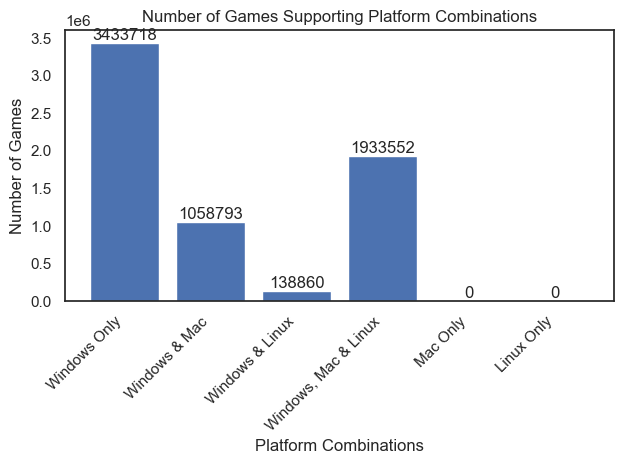

In [28]:
# Platform combinations and their counts

platform_combinations = {
    "Windows Only": win_only,
    "Windows & Mac": win_mac,
    "Windows & Linux": win_linux,
    "Windows, Mac & Linux": win_mac_linux,
    "Mac Only": mac_only,
    "Linux Only": linux_only,
}

fig, ax = plt.subplots()
ax.bar(platform_combinations.keys(), platform_combinations.values())

# Add the counts above the bars
for i, (combination, count) in enumerate(platform_combinations.items()):
    ax.text(i, count + 10, f"{count}", ha='center', va='bottom')

ax.set_title("Number of Games Supporting Platform Combinations")
ax.set_xlabel("Platform Combinations")
ax.set_ylabel("Number of Games")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Windows definitly dominates, when it comes to the number of games it supports. Most developers only develop for windows. However, there are still many games which run on windows, mac and linux. These results tell us that we should consider a users operating system, when recommending a game based on a user_id.

**Most popular Tags**

In [ ]:
# Most common tags, and the impact of tags on game popularity and sales (prices and discounts)

from collections import Counter

# Extract tags and genres
tags = final_df['tags'].explode().dropna()

# Count occurrences of each tag and genre
tag_counts = Counter(tags)

# Find most common tags
most_common_tags = tag_counts.most_common(10)
print('\n'"Most common tags:", most_common_tags)

# Analyze the impact of tags on game popularity and sales
tag_popularity = final_df.explode('tags').groupby('tags').agg({
    'user_reviews': 'mean',
    'positive_ratio': 'mean',
    'price_final': 'mean',
    'price_original': 'mean',
    'discount': 'mean'
}).sort_values(by='user_reviews', ascending=False)

print('\n'"Impact of tags on game popularity, and sales:")
tag_popularity.head(10)


Most common tags: [('Singleplayer', 5306563), ('Action', 5290682), ('Multiplayer', 4688427), ('Adventure', 3726893), ('Co-op', 3532838), ('Open World', 3302693), ('First-Person', 2971991), ('Simulation', 2961854), ('Sandbox', 2919883), ('Atmospheric', 2848759)]


Games with the tags "action", "singleplayer", "multiplayer", "co-op" and "adventure" are the most popular ones based on the number of tags. 

We also observe the impact of tags on game popularity and sales. 
The tag "trading" leads to the most user_reviews. Games with the tags "military" and "war" have the highest average final price and original price. Games with the tags "war" and "tactical" have the highest average discount.

**Trends in game releases, user reviews, and ratings over time**

In [ ]:
# Trends in game releases, user reviews, and ratings over time

final_df['date_release'] = pd.to_datetime(final_df['date_release'])
final_df['date'] = pd.to_datetime(final_df['date'])

game_releases_by_year = final_df.groupby(final_df['date_release'].dt.year).size()
user_reviews_by_year = final_df.groupby(final_df['date'].dt.year)['user_reviews'].sum()
avg_ratings_by_year = final_df.groupby(final_df['date'].dt.year)['positive_ratio'].mean()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Game Releases', color='tab:blue')
ax1.plot(game_releases_by_year.index, game_releases_by_year, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('User Reviews', color='tab:red')
ax2.plot(user_reviews_by_year.index, user_reviews_by_year, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Game Releases and User Reviews Over Time')
plt.show()

plt.plot(avg_ratings_by_year.index, avg_ratings_by_year)
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.title('Average Ratings Over Time')
plt.show()

On average, the number of game releases has increased from 2006 to 2022. There where several drop in 2013, 2018 and 2020. The last drop is most likely due to the Covid-19 pandemic. User started reviewing games since 2010. The number of reviews has strongly increased since then.

The average ratings over time have decreased from 93 in the year 2010 to a rating of 84 in the year 2022. This could potentially indicate that the quality in games has also decreased and user are less satisfied with their games.

## Feature Engineering

**Elapsed Time:** A new feature which tracks the amount of time that has elapsed between the game's release and the review being logged. This could be interested because people who purchase a game right after its release are likely to be larger fans of the genre or franchise.

In [ ]:
final_df["elapsed_time"] = final_df["date"] - final_df["date_release"]

**Relative Recommendation:** Find the rate at which users rated a game positively (out of the count of games they have rated). Then, find for each review whether a recommendation is in line with user's typical reviews or not.

In [ ]:
# Count the number of reviews per user and rename column
usr_rating_count = final_df[["user_id","y"]].groupby("user_id").count()
usr_rating_count.rename(columns = {"y":"review_count"}, inplace = True)

# Find the number of positive reviews
usr_rating_count["positive_reviews"] = final_df[["user_id","y"]].groupby("user_id").sum()

# Find how many reviews out of total are positive
usr_rating_count["positive_rate"] = usr_rating_count["positive_reviews"] / usr_rating_count["review_count"]

In [ ]:
# Merge review_count and positive_rate to the final_df
final_df = final_df.merge(usr_rating_count.reset_index()[["user_id", "review_count", "positive_rate"]], 
                          how = "left", on = "user_id")

# Use these to create an ulterior feature with recommendation relative to average recommendation
final_df["relaitve_rec"] = (final_df["y"] - final_df["positive_rate"])

**Tendency to Review:** People who review more often tend to...

In [ ]:
# Find Review Tendency
final_df["review_tendency"] =  final_df["reviews"] /final_df["products"] 

# Find Tendency Relative to Median Because of Low Values
final_df["rel_review_tendency"] = (final_df["review_tendency"] - final_df["review_tendency"].median())/ final_df["review_tendency"].median()

**Positive & Negative Reviews:** Here we calculate the number of positive and negative reviews for each game. This is done through the positive_ratio column.

In [ ]:
final_df["positive_reviews"] = final_df["positive_ratio"] * final_df["user_reviews"]
final_df["negative_reviews"] = (1 - final_df["positive_ratio"]) * final_df["user_reviews"]

In [ ]:
final_df.head(2)

## Final Dataset Exploration

In [ ]:
# We see how many positive and negative recommendations there are
print(df_recommendations["y"].value_counts())

# What is their ratio?
print("\nHow many positive reviews for each negative one?")
df_recommendations["y"].value_counts()[0]/df_recommendations["y"].value_counts()[1]

## Model Preparation

#### Logistic Regression Model

In [ ]:
# Consider balancing out data because of overwhelming positivity